In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

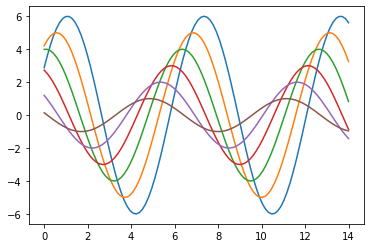

In [3]:
# просто мем для генерации случайных чисел с seed = 1069 (сумма байтовых представлений слова aestрetics)
np.random.seed(sum(map(ord, "aesthetics")))

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

sinplot()

## Стили seaborn
импортируем seaborn и увидим, что даже обычные mpl-графики начнут строиться исходя из выбранного в seaborn стиля

In [5]:
import seaborn as sns
# в seaborn есть 5 предстуановленных стилей:
# white grid, dark grid, white, dark и ticks
sns.set_style('whitegrid')

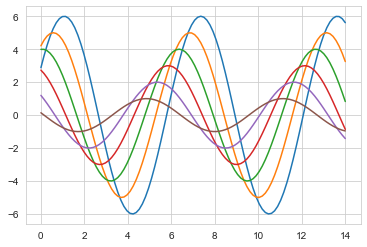

In [6]:
sinplot()

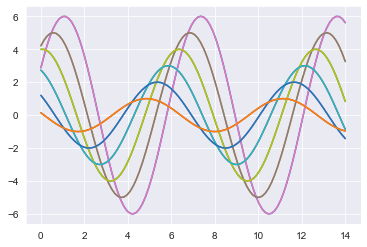

In [9]:
# причём, стили можно установить на время
with sns.axes_style("darkgrid"):
    sinplot()

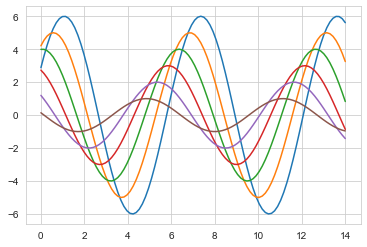

In [10]:
# затем они вернутся к стилю по-умолчанию
sinplot()

как и в matplotlib, стили легко дорабатываются
![alt text](imgs\sns_plotly_1.png "Title")

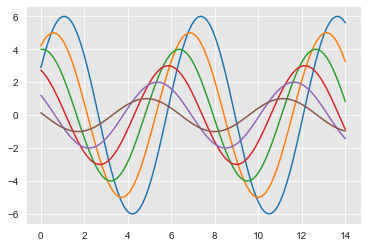

In [11]:
# например, сделаем фон потемнее
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

## Seaborn и массивы данных (студенты открывают практику)

In [3]:
# и он может подгрузить популярные массивы данных
# по названиям из этого репозитория https://github.com/mwaskom/seaborn-data

titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 1. Постройте гистограмму возраста пассажиров
### постройте по нему одномерное распределение

гуглите функцию **distplot**

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


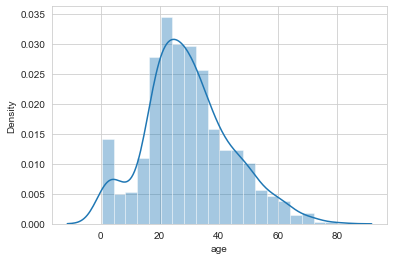

In [6]:
sns.distplot(titanic["age"])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


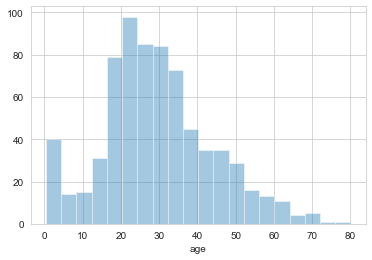

In [7]:
fig = sns.distplot(titanic["age"], kde=False)

## 2. Постройте парную гистограмму "возраст-плата" 

гуглите функцию **jointplot**

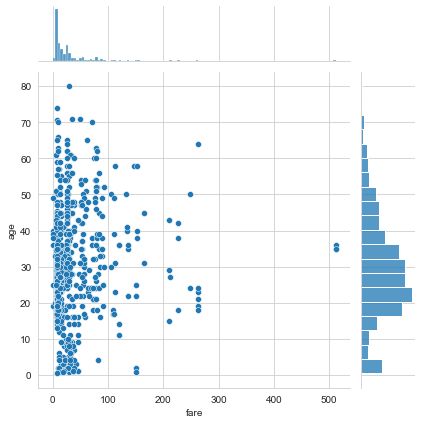

In [8]:
sns.jointplot(x='fare',y='age',data=titanic)

## 3. Постройте ящики с усами со стоимостью для каждого класса пассажиров

гуглите функцию **boxplot**

(0, 250)

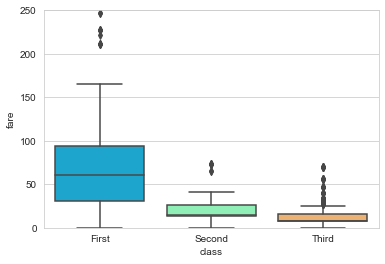

In [9]:
ax = sns.boxplot(x='class',y='fare',data=titanic, palette='rainbow')
ax.set_ylim([0, 250])

In [26]:
print(sns.__version__)

0.11.1


In [10]:
# причём это всё ещё объект matplotlib!
type(ax)

matplotlib.axes._subplots.AxesSubplot

## 4. Постройте гистограмму по категариальной переменной - по полу

гуглите функцию **countplot**

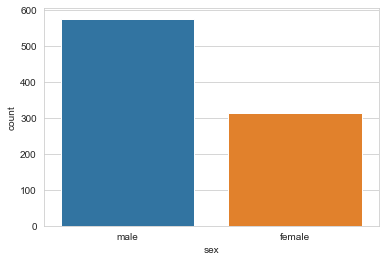

In [11]:
sns.countplot(x='sex',data=titanic)

## 5. Постройте корреляционную функцию между признаками

гуглите функцию **heatmap** и **corr**

Text(0.5, 1, 'titanic.corr()')

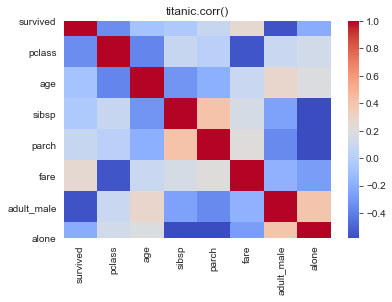

In [24]:
fig = sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

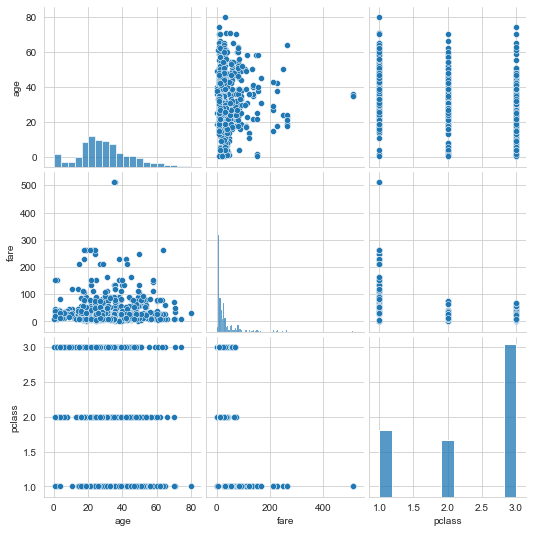

In [23]:
sns.pairplot(titanic[["age", "fare", "pclass"]])

In [16]:
import plotly.tools as tls
import plotly.offline as py

In [25]:
plotly_fig = tls.mpl_to_plotly(fig)
# plotly_fig = go.Figure(plotly_fig) 
# plotly_fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'canvas'